In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pprint
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = "./drive/MyDrive/cmsc320/HW3"

files = ['Dataset Generation (2024) (Responses) - Form Responses 1.csv',
        'Dataset Generation (Fardina) (Responses) - Form Responses 1.csv',
         'Dataset Generation (Max) (Responses) - Form Responses 1.csv']

names = ["2024 survey", "Fardina survey", "Max survey"]

In [ ]:
df0 = pd.read_csv(path + "/" + files[0])
df1 = pd.read_csv(path + "/" + files[1])
df2 = pd.read_csv(path + "/" + files[2])

reorder = list(df1.columns)
reorder = reorder[:7] + reorder[8:] + [reorder[7]]
df1 = df1[reorder]

dfs = [df0, df1, df2]
for i,d in enumerate(dfs):
  r = len(d)
  c = len(d.columns)
  print("num rows x cols in %s: %d x %d"%(names[i], r, c))

# to_int = lambda x: 1 if x else 0
# print(sum([to_int(a) for a in np.logical_not(df2.isnull().any(axis=1))]))

print("\n")
N = 4
# print(df0.columns[N])
for i in range(N,21):
  ans = []
  for d in dfs:
    d = d[np.logical_not(d.isnull().any(axis=1))]
    ans.append(np.unique(d[d.columns[i]]))
  print((df0.columns[i]).replace("\n", " "))
  for i in range(len(ans)):
    print(ans[i])
  print()
# for i, (c1,c2,c3) in enumerate(zip(df0.columns, df1.columns, df2.columns)):
#   print(i)
#   pprint.pp((c1,c2,c3))
#   print()

num rows x cols in 2024 survey: 133 x 21
num rows x cols in Fardina survey: 144 x 22
num rows x cols in Max survey: 103 x 21


You could describe yourself as...
["Don't know / It's complicated" 'Mildly conservative' 'Mildly liberal'
 'Neutral' 'Strongly conservative' 'Strongly liberal']
["Don't know / It's complicated" 'Mildly conservative' 'Mildly liberal'
 'Neutral' 'Strongly conservative' 'Strongly liberal']
["Don't know / It's complicated" 'Mildly conservative' 'Mildly liberal'
 'Neutral' 'Strongly conservative' 'Strongly liberal']

How would you rate your religiousness?
['Not religious at all' 'Somewhat religious' 'Strongly religious']
['Not spiritual at all' 'Somewhat spiritual' 'Strongly spiritual']
['Not spiritual at all' 'Somewhat spiritual' 'Strongly spiritual']

What bests represents your gender?
['Female' 'Male' 'Non-binary / other' 'Prefer not to say']
['Famale' 'Female' 'Male' 'Non-binary / other']
['Famale' 'Female' 'Male' 'Non-binary / other' 'Prefer not to say']

My bo

In [ ]:
print(sum([True]))
print(sum(df0[df0.columns[2]] == 18.))

In [ ]:
def gender_count(arr):
  arr = np.array([str(x).lower() for x in arr])
  f = np.sum([1 if x else 0 for x in list(np.logical_or(arr == "female", arr == "famale"))])
  m = np.sum([1 if x else 0 for x in list(arr == "male")])
  o = np.sum([1 if x else 0 for x in list(np.logical_or(arr == "prefer not to say", arr == "non-binary / other"))])
  return {"f":f, "m":m, "o":o}

N = 6
for i, df in enumerate(ds):
  col = df.columns[N]
  df = df[col][np.logical_not(df.isnull().any(axis=1))]
  gc = gender_count(df)
  print("%s (total = %d):\nmale: %d, female: %d, other: %d"%(names[i], len(df), gc["m"], gc["f"], len(df) - gc["m"] - gc["f"]))
  print()

[1, 133]
[5, 144]
[5, 103]


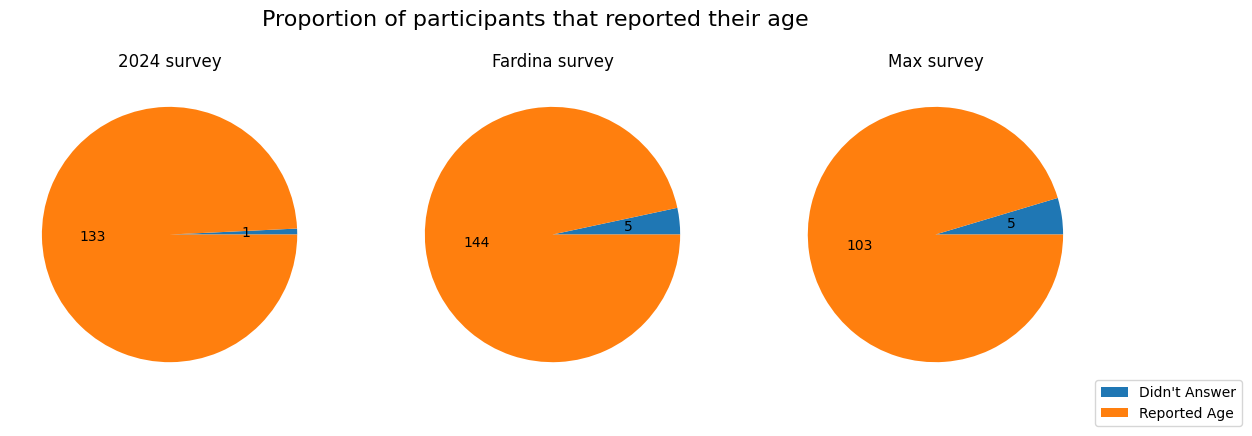

[10, 11, 50, 41, 2, 18, 1]
[9, 16, 58, 30, 5, 21, 5]
[4, 12, 34, 17, 4, 27, 5]


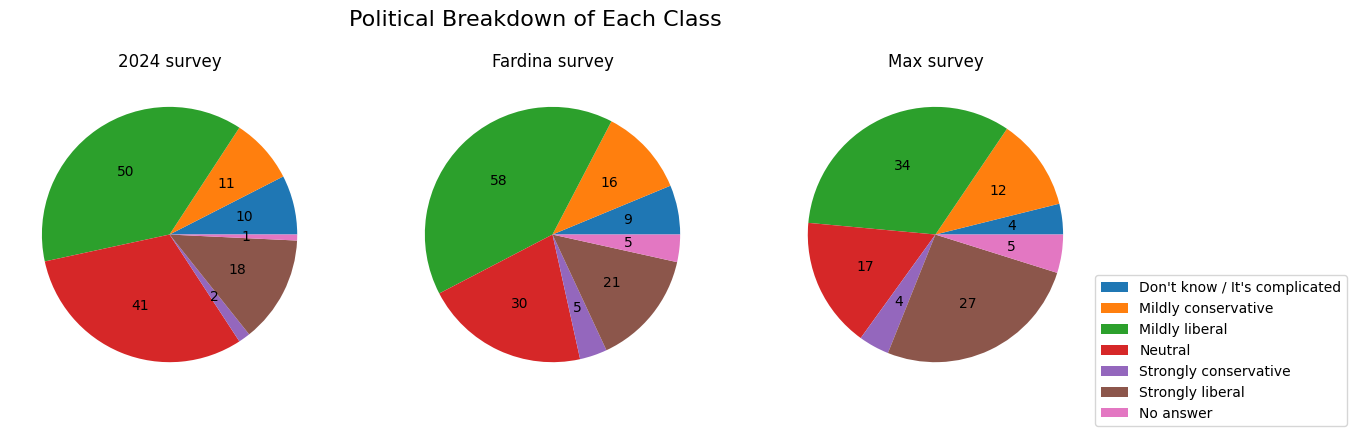

In [ ]:
def count(arr, spec):
  return np.sum([1 if x else 0 for x in (arr == spec)])

N = 4
ds = [df0, df1, df2]
dtype=str


absolute_value = lambda sizes: (lambda val: int(np.round(val/100.*np.sum(sizes), 0)))

fig, ax = plt.subplots(1,3,figsize=(14,10))
for i, df in enumerate(ds):
  is_n = np.sum(df[df.columns[N]].isnull().apply(lambda x: 1 if x else 0))
  not_n = len(df)
  print([is_n, not_n])
  ax[i].pie([is_n, not_n], autopct=absolute_value([is_n,not_n]))
  ax[i].set_title(names[i])
fig.suptitle('Proportion of participants that reported their age', fontsize=16)
fig.subplots_adjust(top=1.4)
plt.legend(labels=["Didn't Answer", "Reported Age"], loc=[1,-0.1])
plt.show()


fig, ax = plt.subplots(1,3,figsize=(14,10))
col = df0.columns[N]
colors = ['red', 'orange', 'blue', 'green', 'purple', 'brown', 'pink']
for i, df in enumerate(ds):
  data = []
  nulls = df[col].isnull()
  d_col = df[col][np.logical_not(nulls)]
  labels = list(np.unique(d_col)) + ["No answer"]
  for l in labels[:-1]:
    data.append(np.sum((d_col == l).apply(lambda x: 1 if x else 0)))
  data.append(np.sum(nulls.apply(lambda x: 1 if x else 0)))
  print(data)
  ax[i].pie(data, autopct=absolute_value(data))
  ax[i].set_title(names[i])
fig.suptitle('Political Breakdown of Each Class', fontsize=16)
fig.subplots_adjust(top=1.4)
plt.legend(labels=labels, loc=[1,-0.1])
plt.show()


# xs = []
# for i,df in enumerate(ds):
#   df = df[np.logical_not(df.isnull().any(axis=1))]
#   col = df.columns[N]
#   xs.extend(list(np.unique(df[col].astype(int if i == 0 else str).astype(str))))
# xs = np.sort(np.unique(xs))
#
# for i,df in enumerate(ds):
#   df = df[np.logical_not(df.isnull().any(axis=1))]
#   col = df.columns[N]
#   df_c = df[col].astype(int if i == 0 else str).astype(str)
#   counts = [count(df_c, x) for x in xs]
#   plt.bar(xs, counts, label=names[i])
#
# plt.title("age distribution of participants in survey")
# plt.legend()
# plt.show()